# mini-TP1 : Régression linéaire

Pour ce TP, nous allons utiliser le Boston Housing Price Data Set (corpus des prix du logement à Boston), qui est fourni dans la bibliothèque SciKit Learn. Les détails concernant cet corpus de données sont disponibles à l'adresse suivante : [lien](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Tout d'abord, nous importons toutes les librairies nécessaires :

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

## Récupération et exploration des données

Nous allons charger le corpus de données à l'aide de la méthode ```load_boston```, qui renverra un objet _Bunch_. Un objet Bunch se comporte comme un dictionnaire Python :

- ```data``` : Données à apprendre.
- ```target``` : Colonne cible, pour cet exemple la valeur médiane d'une maison occupée par son propriétaire sera la cible.
- ```DESCR``` : Description de l'ensemble de données, y compris la signification des en-têtes.
- ```feature_names``` : Noms des en-têtes.
- ```filename``` : Emplacement physique à partir duquel les données ont été créées.

In [62]:
boston = load_boston()

c:\Users\Stephen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

Une exploration rapide du corpus (qui n'est pas développée ici) nous fait nous rendre compte qu'il manque des choses dans nos données pour qu'elles soient exploitables directement : il manque le nom de certains en-têtes, et il manque la colonne cible. Nous commençons donc par les ajouter :

In [63]:
# Creation d'une Pandas Data Frame à partir de notre corpus

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [64]:
# Modification des données pour la classification

df['MEDV'] = boston.target
df.isnull().sum()
df.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


Pour visualiser la relation entre les données observées et la variable cible (MEDV), nous utiliserons un diagramme de régression. **Est-ce qu'un autre type de visualisation pourrait être pertinent ?**

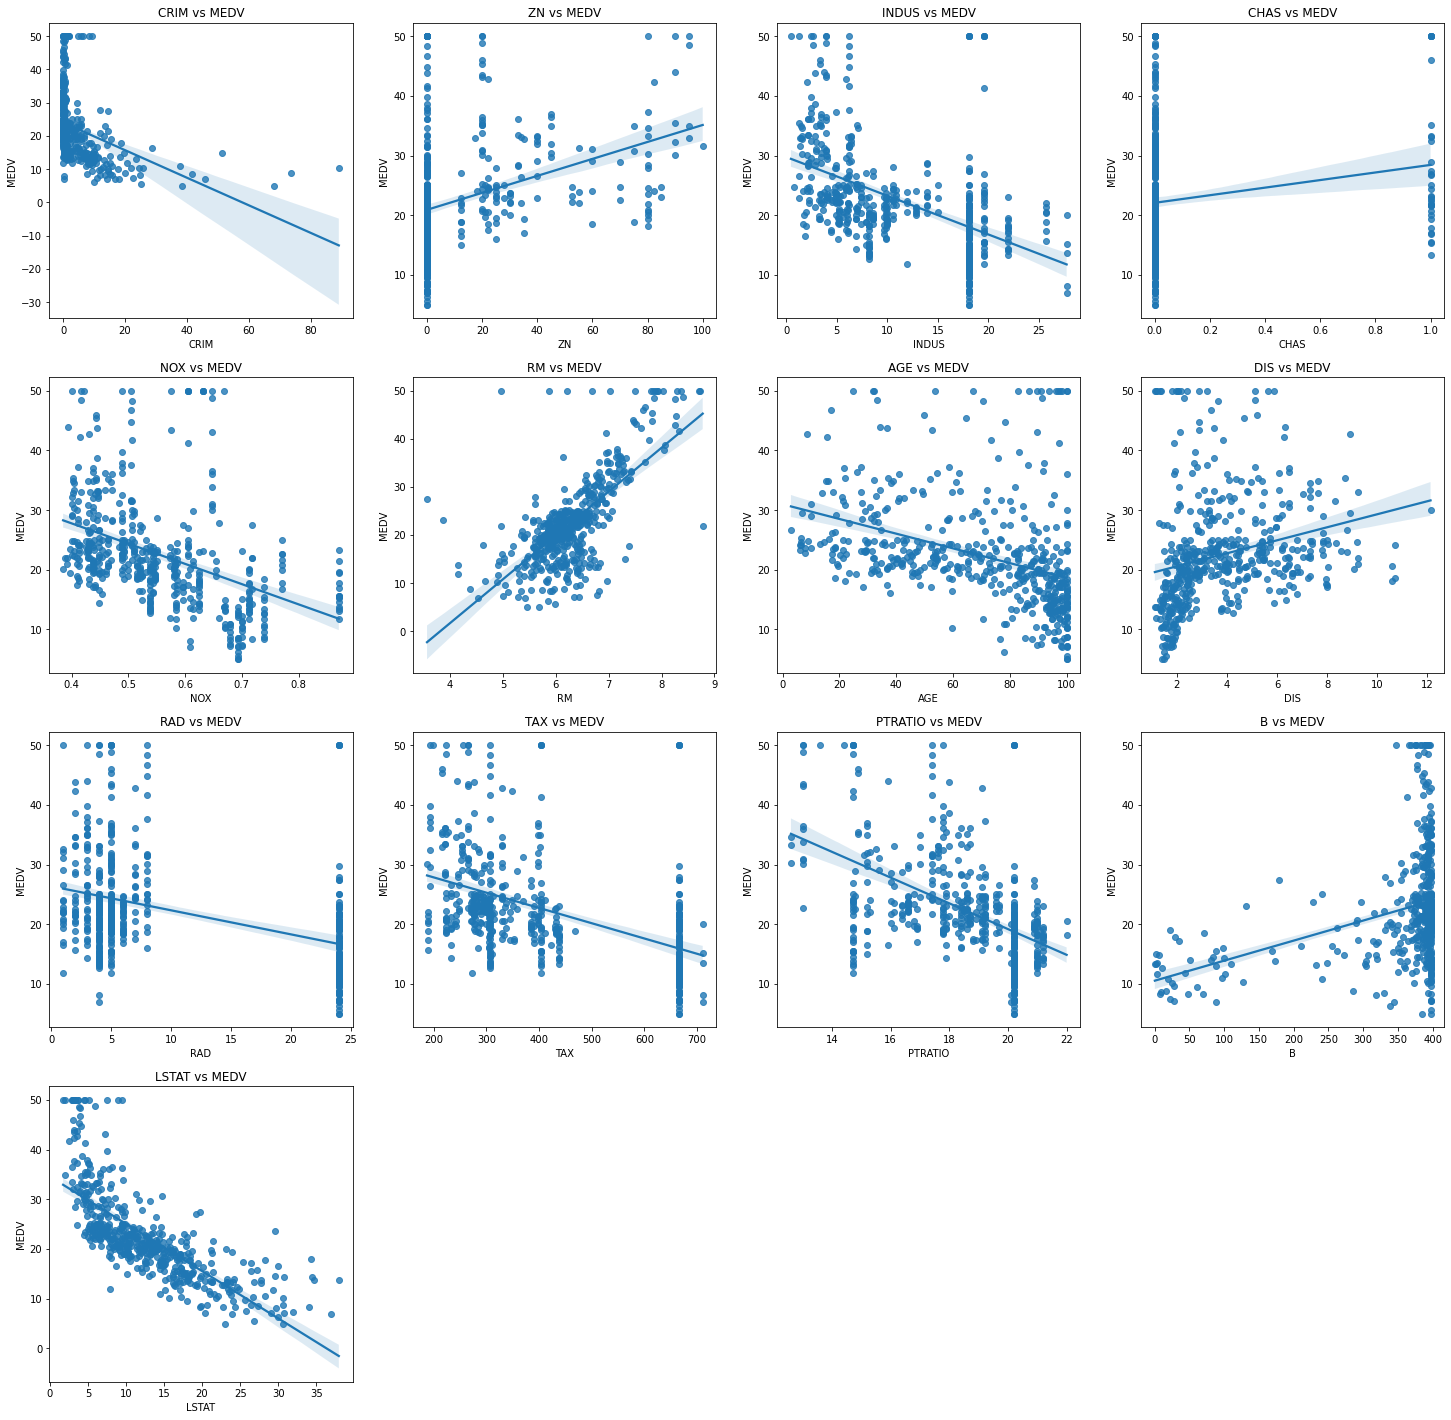

In [65]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(boston.feature_names):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV" %(col))

**Que peut-on observer ?**
- Sur la variable `RM` par rapport à la variable `MEDV` ?
- Sur la variable `LTSTAT` par rapport à la variable `MEDV` ?
- Sur les relations entre les autres variables et `MEDV` ?

## Création du modèle linéaire

Maintenant que nous avons identifié des variables qui semblent avoir une relation linéaire avec notre variable cible, nous pouvons commencer à développer le modèle de régression linéaire. Dans cet exemple, nous ne nous intéresserons qu'à la variable `RM`.

Tout d'abord, nous allons importer la classe LinearRegression de la bibliothèque SciKit et créer un objet LinearRegression. Ensuite, nous allons entraîner le modèle, trouver la pente et l'ordonnée à l'origine, et enfin, faire des prédictions.

REMARQUE : dans le cadre de ce TP nous utilisons toutes les données disponibles pour l'entraînement du modèle. En règle générale, nous diviserons les données en données de test et d'entrainement. 

In [66]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
lm3 = LinearRegression()
X1 = df[['RM']]
Y1 = df[['MEDV']] # Target
Y3 = df[['AGE']]

# Fit (Train) the model
lm1.fit(X1,Y1)
lm3.fit(X1,Y3)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)
Yout3 = lm3.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is [-34.67062078] and the scope is [[9.10210898]]
Predicted Values: [[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


Nous pouvons aussi regarder une régression linéaire multiple en nous intéressant à deux variables : `RM` et `LSTAT`.

In [67]:
lm2 = LinearRegression()
lm4 = LinearRegression()
X2 = df[['RM', 'LSTAT']]
Y2 = df[['MEDV']]
Z3 = df[['AGE']]

# Fit (Train) the model
lm2.fit(X2,Y2)
lm3.fit(X2,Z3)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)
Yout4 = lm3.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[0:5])
print("Actual Values:",Y2.values[0:5])

Intercept for the model is [-1.35827281] and the scope is [[ 5.09478798 -0.64235833]]
Predicted Values: [[28.94101368]
 [25.48420566]
 [32.65907477]
 [32.40652   ]
 [31.63040699]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


## Visualisation du modèle

Nous allons visualiser les modèles que nous avons créés. Pour la régression linéaire simple, nous pouvons utiliser le diagramme de régression ou le diagramme des résidus. Dans le cas du diagramme de régression, nous devons nous concentrer sur l'écart des données par rapport à la ligne de régression. Si les données sont trop éloignées de la ligne de régression, on peut dire que le modèle linéaire n'est pas le mieux adapté.

Comme nous avons déjà utilisé le diagramme de régression, nous allons utiliser le diagramme des résidus. Un résidu est la différence entre la valeur observée (Y) et la valeur prédite (Yout). Dans le diagramme des résidus, l'axe X représente la variable indépendante et l'axe Y les résidus. Si les points d'un diagramme de résidus sont répartis de manière aléatoire autour de l'axe des x, cela signifie qu'un modèle linéaire est approprié pour les données. Des résidus répartis de manière aléatoire signifient que la variance est constante, et donc que le modèle linéaire est bien adapté à ces données.

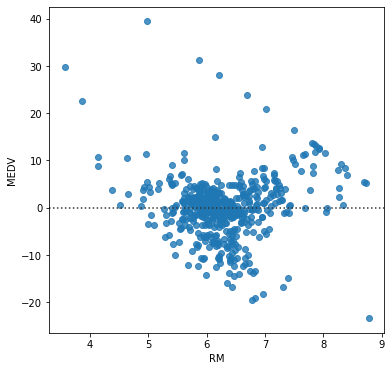

In [68]:
# On utilise la librairie Seaborn pour tracer le diagramme des résidus

plt.figure(figsize=(6,6))
sns.residplot(data=df,x="RM",y="MEDV")
plt.show()

**La régression linéaire était-elle adaptée ?**

## Évaluation du modèle

Nous utilisons les méthodes quantitatives suivantes pour déterminer la précision du modèle :

**Erreur quadratique moyenne (Mean Squared Error, MSE)**

L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs. Elle est calculée de la manière suivante :
- on trouve l'erreur entre la valeur réelle et la valeur prédite 
- on prend le carré de cette erreur
- on additionne toutes les valeurs
- on divise par le nombre de valeurs

**Cefficient de détermination**

Le coefficient de détermination R^2 est une mesure qui indique à quel point les données sont proches de la ligne de régression ajustée.

R^2 = 1 - MSE de la droite de régression / MSE de la moyenne des données

Comment déterminer quel est le meilleur modèle ? Le modèle qui a la valeur MSE la plus basse et la valeur R^2 la plus élevée.

Nous pouvons utiliser `sklearn.metrics.mean_squared_error` pour trouver l'erreur quadratique moyenne et la méthode `model.score()` pour obtenir la valeur R^2.

In [69]:
from sklearn.metrics import mean_squared_error

# Simple Linear Regression

mse1 = mean_squared_error(Y1,Yout1)
print("La valeur de la MSE pour la régression linéaire simple est",mse1)
print("La valeur du R^2 pour la régression linéaire simple est", lm1.score(X1,Y1))
print("\n")

# Multiple Linear Regression

mse2 = mean_squared_error(Y2,Yout2)
print("La valeur de la MSE pour la régression linéaire multiple est",mse2)
print("La valeur du R^2 pour la régression linéaire multiple est", lm2.score(X2,Y2))


mse3 = mean_squared_error(Y3,Yout3)
print("La valeur de la MSE pour la régression linéaire multiple est",mse3)
print("La valeur du R^2 pour la régression linéaire multiple est", lm3.score(X2,Z3))



La valeur de la MSE pour la régression linéaire simple est 43.60055177116956
La valeur du R^2 pour la régression linéaire simple est 0.48352545599133423


La valeur de la MSE pour la régression linéaire multiple est 30.51246877729947
La valeur du R^2 pour la régression linéaire multiple est 0.6385616062603403
La valeur de la MSE pour la régression linéaire multiple est 745.1422082479756
La valeur du R^2 pour la régression linéaire multiple est 0.389701387779385


**Quel modèle semble mieux adapté ?**

Ce TP est adapté du tutoriel https://www.kaggle.com/code/sarbjit87/linear-regression-tutorial-with-example par Maria Boritchev. Pour toute question, écrire à maria.boritchev@telecom-paris.fr 